In [1]:
%config IPCompleter.greedy=True
import findspark
findspark.init()
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import os

In [2]:
conf=SparkConf().setMaster("local[*]").setAppName("MovieRecommendationApp")
sc = SparkContext.getOrCreate(conf=conf) 

In [3]:
# Dosya konumunu kontrol et
toplam_dosya_adi = "toplam_dosya.txt"
if not os.path.exists(toplam_dosya_adi):
    # Dosyaların listesini oluştur
    dosya_listesi = ["combined_data_1.txt", "combined_data_2.txt", "combined_data_3.txt", "combined_data_4.txt"]

    # Toplanmış satırları saklamak için bir liste oluştur
    toplanmis_satirlar = []

    # Her dosyayı işle
    for dosya_adi in dosya_listesi:
        # Dosyayı oku
        with open(dosya_adi, "r") as dosya:
            satirlar = dosya.readlines()

        # Satırları işle
        current_section = None
        for satir in satirlar:
            if satir.strip().endswith(":"):
                current_section = satir.strip()[:-1]
            else:
                toplanmis_satirlar.append(f"{current_section},{satir.strip()}")

    # Toplanmış satırları toplam dosyasına yaz
    with open(toplam_dosya_adi, "w") as toplam_dosya:
        for satir in toplanmis_satirlar:
            toplam_dosya.write(satir + "\n")

In [4]:
from pyspark.sql import SparkSession
# Create a SparkSession\n",
spark = SparkSession.builder.getOrCreate()

# Read the CSV file into a DataFrame",
df = spark.read.csv("toplam_dosya.txt", header=False, inferSchema=True)

In [5]:
df.show()

+---+-------+---+-------------------+
|_c0|    _c1|_c2|                _c3|
+---+-------+---+-------------------+
|  1|1488844|  3|2005-09-06 00:00:00|
|  1| 822109|  5|2005-05-13 00:00:00|
|  1| 885013|  4|2005-10-19 00:00:00|
|  1|  30878|  4|2005-12-26 00:00:00|
|  1| 823519|  3|2004-05-03 00:00:00|
|  1| 893988|  3|2005-11-17 00:00:00|
|  1| 124105|  4|2004-08-05 00:00:00|
|  1|1248029|  3|2004-04-22 00:00:00|
|  1|1842128|  4|2004-05-09 00:00:00|
|  1|2238063|  3|2005-05-11 00:00:00|
|  1|1503895|  4|2005-05-19 00:00:00|
|  1|2207774|  5|2005-06-06 00:00:00|
|  1|2590061|  3|2004-08-12 00:00:00|
|  1|   2442|  3|2004-04-14 00:00:00|
|  1| 543865|  4|2004-05-28 00:00:00|
|  1|1209119|  4|2004-03-23 00:00:00|
|  1| 804919|  4|2004-06-10 00:00:00|
|  1|1086807|  3|2004-12-28 00:00:00|
|  1|1711859|  4|2005-05-08 00:00:00|
|  1| 372233|  5|2005-11-23 00:00:00|
+---+-------+---+-------------------+
only showing top 20 rows



In [6]:
# Sütun isimlerini belirle
column_names = ["movieID", "userID", "rating", "date"]

# Sütunları yeniden adlandır
for i in range(len(column_names)):
    df = df.withColumnRenamed("_c" + str(i), column_names[i])

In [7]:
df.show()

+-------+-------+------+-------------------+
|movieID| userID|rating|               date|
+-------+-------+------+-------------------+
|      1|1488844|     3|2005-09-06 00:00:00|
|      1| 822109|     5|2005-05-13 00:00:00|
|      1| 885013|     4|2005-10-19 00:00:00|
|      1|  30878|     4|2005-12-26 00:00:00|
|      1| 823519|     3|2004-05-03 00:00:00|
|      1| 893988|     3|2005-11-17 00:00:00|
|      1| 124105|     4|2004-08-05 00:00:00|
|      1|1248029|     3|2004-04-22 00:00:00|
|      1|1842128|     4|2004-05-09 00:00:00|
|      1|2238063|     3|2005-05-11 00:00:00|
|      1|1503895|     4|2005-05-19 00:00:00|
|      1|2207774|     5|2005-06-06 00:00:00|
|      1|2590061|     3|2004-08-12 00:00:00|
|      1|   2442|     3|2004-04-14 00:00:00|
|      1| 543865|     4|2004-05-28 00:00:00|
|      1|1209119|     4|2004-03-23 00:00:00|
|      1| 804919|     4|2004-06-10 00:00:00|
|      1|1086807|     3|2004-12-28 00:00:00|
|      1|1711859|     4|2005-05-08 00:00:00|
|      1| 

In [8]:
df.count()

100480507

In [9]:
df = df.select("movieID", "userID", "rating")

In [10]:
df.show()

+-------+-------+------+
|movieID| userID|rating|
+-------+-------+------+
|      1|1488844|     3|
|      1| 822109|     5|
|      1| 885013|     4|
|      1|  30878|     4|
|      1| 823519|     3|
|      1| 893988|     3|
|      1| 124105|     4|
|      1|1248029|     3|
|      1|1842128|     4|
|      1|2238063|     3|
|      1|1503895|     4|
|      1|2207774|     5|
|      1|2590061|     3|
|      1|   2442|     3|
|      1| 543865|     4|
|      1|1209119|     4|
|      1| 804919|     4|
|      1|1086807|     3|
|      1|1711859|     4|
|      1| 372233|     5|
+-------+-------+------+
only showing top 20 rows



In [11]:
print("Number of sample: ",df.count())
print("Number of unique movies : ",df.select("movieID").distinct().count())
print("Number of unique user : ",df.select("userID").distinct().count())

Number of sample:  100480507
Number of unique movies :  17770
Number of unique user :  480189


In [12]:
df.groupBy("rating").count().show()

+------+--------+
|rating|   count|
+------+--------+
|     1| 4617990|
|     3|28811247|
|     5|23168232|
|     4|33750958|
|     2|10132080|
+------+--------+



In [13]:
rating_distribution = df.groupBy("rating").count()

In [14]:
# Get the total number of ratings
total_rating_number = rating_distribution.agg({"count": "sum"}).collect()[0]["sum(count)"]

# Calculate percentile values
rating_distribution = rating_distribution.withColumn("percent", rating_distribution["count"] / total_rating_number * 100)

# Collect data for pie chart
pie_data = rating_distribution.select("rating", "percent").collect()

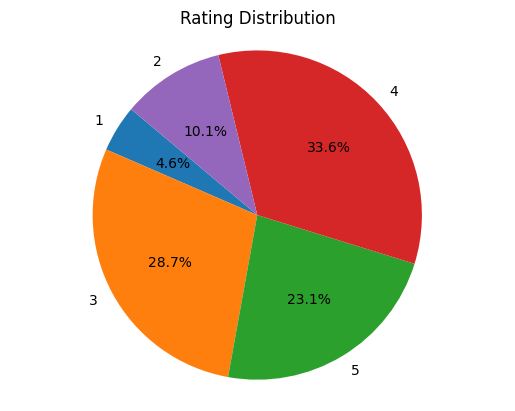

In [15]:
# Draw a pie chart
labels = [str(row["rating"]) for row in pie_data]
sizes = [row["percent"] for row in pie_data]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Makes the circle round
plt.title('Rating Distribution')
plt.show()

In [17]:
df.select("rating").rdd.map(lambda x: x[0]).stats()

(count: 100480507, mean: 3.604289964420676, stdev: 1.0852185592294221, max: 5.0, min: 1.0)

In [18]:
movie_df = spark.read.csv("movie_titles.csv", header=False, inferSchema=True)

In [19]:
movie_df.show()

+---+----+--------------------+
|_c0| _c1|                 _c2|
+---+----+--------------------+
|  1|2003|     Dinosaur Planet|
|  2|2004|Isle of Man TT 20...|
|  3|1997|           Character|
|  4|1994|Paula Abdul's Get...|
|  5|2004|The Rise and Fall...|
|  6|1997|                Sick|
|  7|1992|               8 Man|
|  8|2004|What the #$*! Do ...|
|  9|1991|Class of Nuke 'Em...|
| 10|2001|             Fighter|
| 11|1999|Full Frame: Docum...|
| 12|1947|My Favorite Brunette|
| 13|2003|Lord of the Rings...|
| 14|1982|  Nature: Antarctica|
| 15|1988|Neil Diamond: Gre...|
| 16|1996|           Screamers|
| 17|2005|           7 Seconds|
| 18|1994|    Immortal Beloved|
| 19|2000|By Dawn's Early L...|
| 20|1972|     Seeta Aur Geeta|
+---+----+--------------------+
only showing top 20 rows



In [20]:
# Sütun isimlerini belirle
column_names = ["movieID", "release_year", "title"]

# Sütunları yeniden adlandır
for i in range(len(column_names)):
    movie_df = movie_df.withColumnRenamed("_c" + str(i), column_names[i])

In [21]:
movie_df.show()

+-------+------------+--------------------+
|movieID|release_year|               title|
+-------+------------+--------------------+
|      1|        2003|     Dinosaur Planet|
|      2|        2004|Isle of Man TT 20...|
|      3|        1997|           Character|
|      4|        1994|Paula Abdul's Get...|
|      5|        2004|The Rise and Fall...|
|      6|        1997|                Sick|
|      7|        1992|               8 Man|
|      8|        2004|What the #$*! Do ...|
|      9|        1991|Class of Nuke 'Em...|
|     10|        2001|             Fighter|
|     11|        1999|Full Frame: Docum...|
|     12|        1947|My Favorite Brunette|
|     13|        2003|Lord of the Rings...|
|     14|        1982|  Nature: Antarctica|
|     15|        1988|Neil Diamond: Gre...|
|     16|        1996|           Screamers|
|     17|        2005|           7 Seconds|
|     18|        1994|    Immortal Beloved|
|     19|        2000|By Dawn's Early L...|
|     20|        1972|     Seeta

In [22]:
main_data = df.join(movie_df, on="movieID", how="inner")

In [23]:
main_data.show()

+-------+-------+------+------------+---------------+
|movieID| userID|rating|release_year|          title|
+-------+-------+------+------------+---------------+
|      1|1488844|     3|        2003|Dinosaur Planet|
|      1| 822109|     5|        2003|Dinosaur Planet|
|      1| 885013|     4|        2003|Dinosaur Planet|
|      1|  30878|     4|        2003|Dinosaur Planet|
|      1| 823519|     3|        2003|Dinosaur Planet|
|      1| 893988|     3|        2003|Dinosaur Planet|
|      1| 124105|     4|        2003|Dinosaur Planet|
|      1|1248029|     3|        2003|Dinosaur Planet|
|      1|1842128|     4|        2003|Dinosaur Planet|
|      1|2238063|     3|        2003|Dinosaur Planet|
|      1|1503895|     4|        2003|Dinosaur Planet|
|      1|2207774|     5|        2003|Dinosaur Planet|
|      1|2590061|     3|        2003|Dinosaur Planet|
|      1|   2442|     3|        2003|Dinosaur Planet|
|      1| 543865|     4|        2003|Dinosaur Planet|
|      1|1209119|     4|    

In [24]:
main_data.printSchema()

root
 |-- movieID: integer (nullable = true)
 |-- userID: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- release_year: string (nullable = true)
 |-- title: string (nullable = true)



In [25]:
main_data = main_data.withColumn("release_year", col("release_year").cast("integer"))

# Print the schema of the DataFrame
main_data.printSchema()

root
 |-- movieID: integer (nullable = true)
 |-- userID: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- title: string (nullable = true)



In [26]:
main_data.count()

100480507

In [27]:
# Find the number of null values for each column
null_values = {column: main_data.where(col(column).isNull()).count() for column in main_data.columns}

# Calculate the total number of null values
total_null_value_number = sum(null_values.values())

# Print the result to the screen
print("Total number of null values:", total_null_value_number)
print("Number of null values by column")
for column, null_number in null_values.items():
    print(f"{column}: {null_number}")

Total number of null values: 965
Number of null values by column
movieID: 0
userID: 0
rating: 0
release_year: 965
title: 0


In [28]:
unique_years = main_data.select("release_year").rdd.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
unique_years_count = unique_years.count()

print("The release_year column has", unique_years_count ,"different values.")

The release_year column has 95 different values.


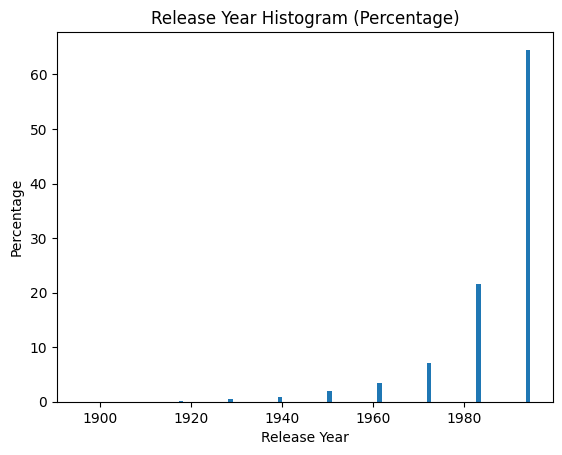

In [29]:
# release_year sütununu RDD'ye dönüştür
release_years_rdd = main_data.select("release_year").rdd.flatMap(lambda x: x)

# Histogram oluştur
histogram = release_years_rdd.histogram(10) 

# Histogram verilerini çıkar
bins = histogram[0]
frequencies = histogram[1]

# Toplam veri sayısını al
total_count = release_years_rdd.count()

# Frekansları yüzde cinsinden hesapla
percentage_frequencies = [count / total_count * 100 for count in frequencies]

plt.bar(bins[:-1], percentage_frequencies, width=1.0)
plt.xlabel("Release Year")
plt.ylabel("Percentage")
plt.title("Release Year Histogram (Percentage)")
plt.show()

In [30]:
# Null değerlere sahip satırları filtrele
filtered_df = main_data.filter(col("release_year").isNotNull())

# Filtrelenmiş DataFrame üzerinde istatistikleri al
filtered_df.select("release_year").rdd.flatMap(lambda x: x).stats()

(count: 100479542, mean: 1993.9115270947439, stdev: 12.400832093801789, max: 2005.0, min: 1896.0)

In [31]:
# rating ve title sütunlarını alıp RDD'ye dönüştürme
rdd = main_data.select("rating", "title").rdd.map(lambda x: (x[1], x[0]))

# Oy ortalaması en yüksek olan filmleri bulma
top_10_high_avg_rating = rdd.mapValues(lambda x: (x, 1)) \
    .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
    .mapValues(lambda x: x[0] / x[1]) \
    .takeOrdered(10, key=lambda x: -x[1])

print("\nTop 10 Movies with Highest Average Rating:")
for title, avg_rating in top_10_high_avg_rating:
    print(f"{title}: {avg_rating}")


Top 10 Movies with Highest Average Rating:
Lord of the Rings: The Return of the King: Extended Edition: 4.723269925683507
The Lord of the Rings: The Fellowship of the Ring: Extended Edition: 4.716610825093296
Lord of the Rings: The Two Towers: Extended Edition: 4.702611063648014
Lost: Season 1: 4.6709891019450955
Battlestar Galactica: Season 1: 4.638809387521466
Fullmetal Alchemist: 4.605021432945499
Trailer Park Boys: Season 4: 4.6
Trailer Park Boys: Season 3: 4.6
Tenchi Muyo! Ryo Ohki: 4.595505617977528
The Shawshank Redemption: Special Edition: 4.593383932407275


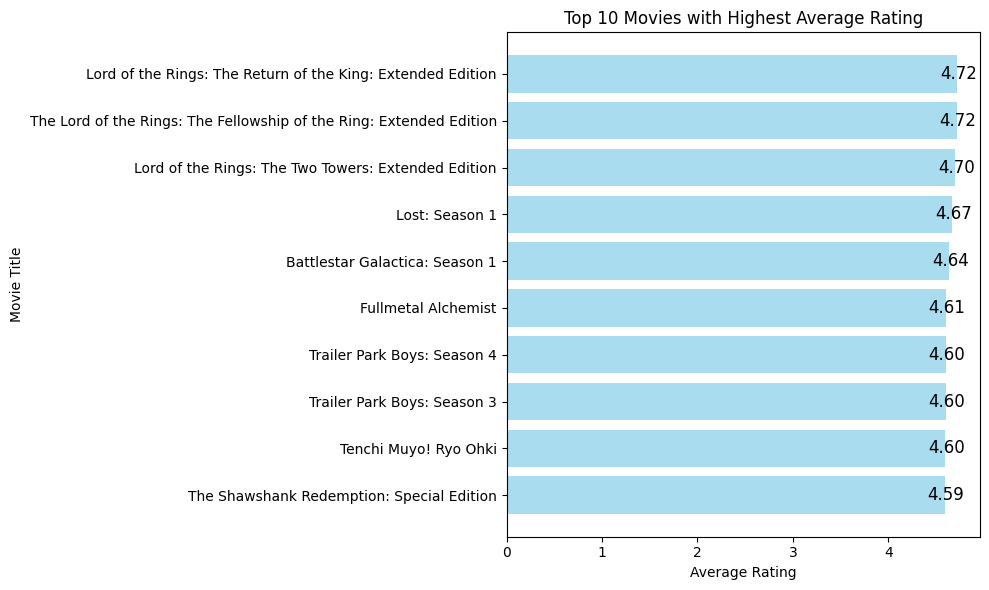

In [32]:
# Top 10 filmleri ve ortalama puanlarını listelerden ayırın
titles = [movie[0] for movie in top_10_high_avg_rating]
avg_ratings = [movie[1] for movie in top_10_high_avg_rating]

plt.figure(figsize=(10, 6))

# Her filmin ortalama puanını çubuğun üzerinde göstermek için 'annotation' kullanın
plt.barh(titles, avg_ratings, color='skyblue', alpha=0.7)
for i, v in enumerate(avg_ratings):
    plt.text(v + 0.01, i, f"{v:.2f}", ha='center', va='center', fontsize=12)

plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Highest Average Rating')
plt.gca().invert_yaxis()  # Filmleri puana göre sıralayın (en yüksekten en düşükte)
plt.tight_layout()

plt.show()

In [33]:
# Oy ortalaması en düşük olan filmleri bulma
top_10_low_avg_rating = rdd.mapValues(lambda x: (x, 1)) \
    .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
    .mapValues(lambda x: x[0] / x[1]) \
    .takeOrdered(10, key=lambda x: x[1])

print("\nTop 10 Movies with Lowest Average Rating:")
for title, avg_rating in top_10_low_avg_rating:
    print(f"{title}: {avg_rating}")


Top 10 Movies with Lowest Average Rating:
Avia Vampire Hunter: 1.2878787878787878
Zodiac Killer: 1.3460207612456747
Alone in a Haunted House: 1.3756097560975609
Vampire Assassins: 1.3967611336032388
Absolution: 1.4
The Worst Horror Movie Ever Made: 1.4
Ax 'Em: 1.4222222222222223
Dark Harvest 2: The Maize: 1.4523809523809523
Half-Caste: 1.4873949579831933
The Horror Within: 1.4962406015037595


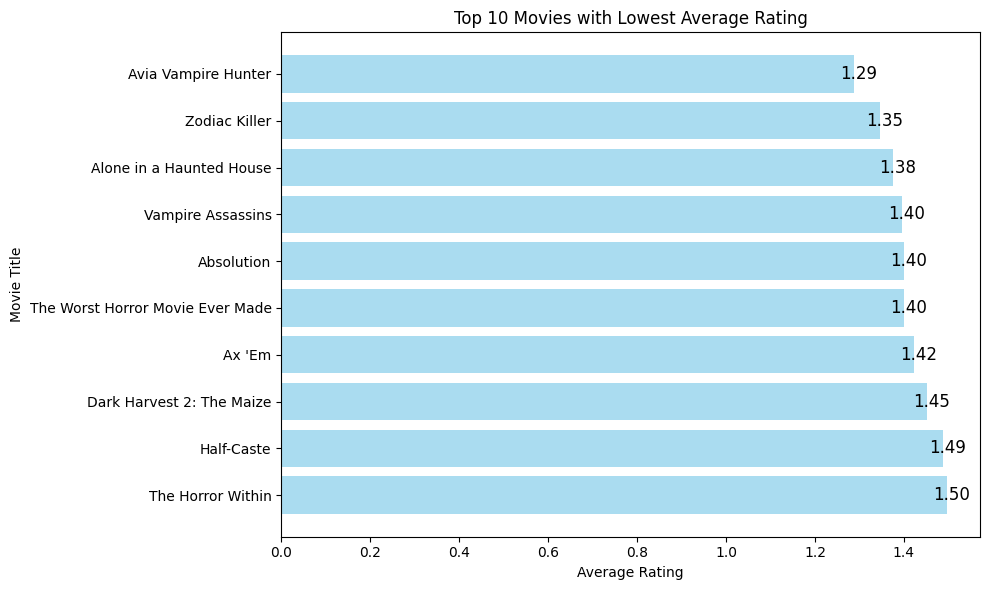

In [34]:
# Top 10 filmleri ve ortalama puanlarını listelerden ayırın
titles = [movie[0] for movie in top_10_low_avg_rating]
avg_ratings = [movie[1] for movie in top_10_low_avg_rating]

plt.figure(figsize=(10, 6))

# Her filmin ortalama puanını çubuğun üzerinde göstermek için 'annotation' kullanın
plt.barh(titles, avg_ratings, color='skyblue', alpha=0.7)
for i, v in enumerate(avg_ratings):
    plt.text(v + 0.01, i, f"{v:.2f}", ha='center', va='center', fontsize=12)

plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Lowest Average Rating')
plt.gca().invert_yaxis()  # Filmleri puana göre sıralayın (en yüksekten en düşükte)
plt.tight_layout()

plt.show()

In [35]:
title_counts = main_data.rdd \
    .map(lambda row: (row.title, 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

# Toplam satır sayısını alın
total_rows = main_data.count()

# Her filmin oranını hesaplayın ve yazdırın
for title, count in title_counts:
    percentage = round((count / total_rows) * 100, 2)
    print(f"{title}: {count} ({percentage}%)")

Miss Congeniality: 232944 (0.23%)
Independence Day: 216596 (0.22%)
The Patriot: 211764 (0.21%)
The Godfather: 206551 (0.21%)
The Day After Tomorrow: 196397 (0.2%)
Pirates of the Caribbean: The Curse of the Black Pearl: 193941 (0.19%)
Pretty Woman: 193295 (0.19%)
Twister: 187808 (0.19%)
Gone in 60 Seconds: 183590 (0.18%)
Forrest Gump: 181508 (0.18%)


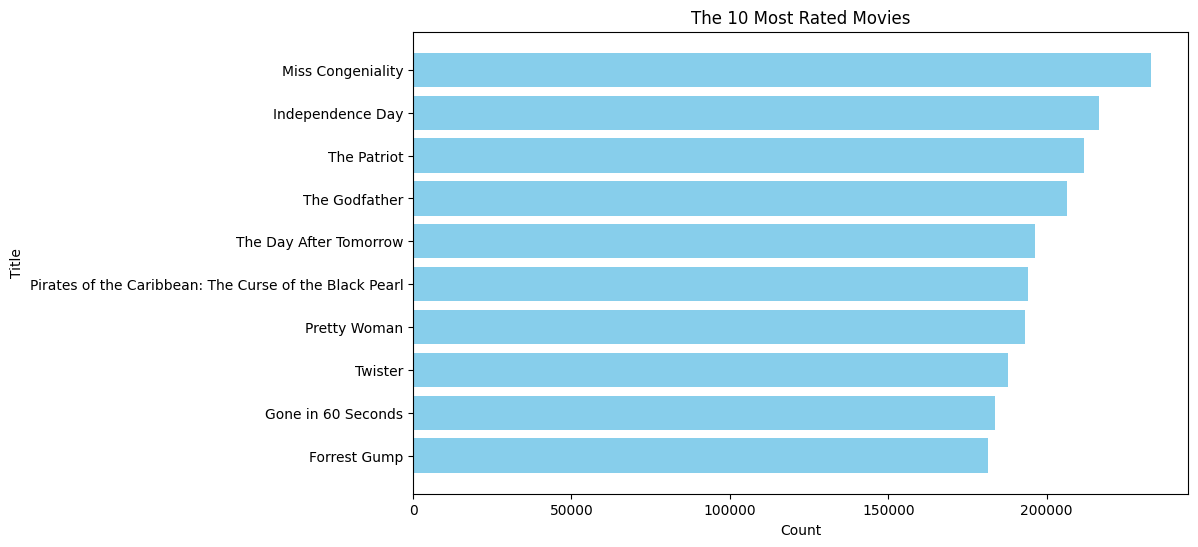

In [38]:
# Parse data
titles, counts = zip(*title_counts)

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(titles, counts, color='skyblue')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.title('The 10 Most Rated Movies')
plt.gca().invert_yaxis()
plt.show()

In [39]:
title_counts = main_data.rdd \
    .map(lambda row: (row.title, 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .sortBy(lambda x: x[1], ascending=True) \
    .take(10)

# Toplam satır sayısını alın
total_rows = main_data.count()

# Her filmin oranını hesaplayın ve yazdırın
for title, count in title_counts:
    percentage = round((count / total_rows) * 100, 2)
    print(f"{title}: {count} ({percentage}%)")

Mobsters and Mormons: 3 (0.0%)
The Land Before Time IV: Journey Through the Mists: 5 (0.0%)
Larryboy and the Rumor Weed: 10 (0.0%)
Hockey Mom: 10 (0.0%)
Dune: Extended Edition: 13 (0.0%)
The Land Before Time VI: The Secret of Saurus Rock: 14 (0.0%)
Journey Into Amazing Caves: IMAX: 22 (0.0%)
The Triangle: 22 (0.0%)
Ah! My Goddess: 23 (0.0%)
Trailer Park Boys: Season 4: 25 (0.0%)


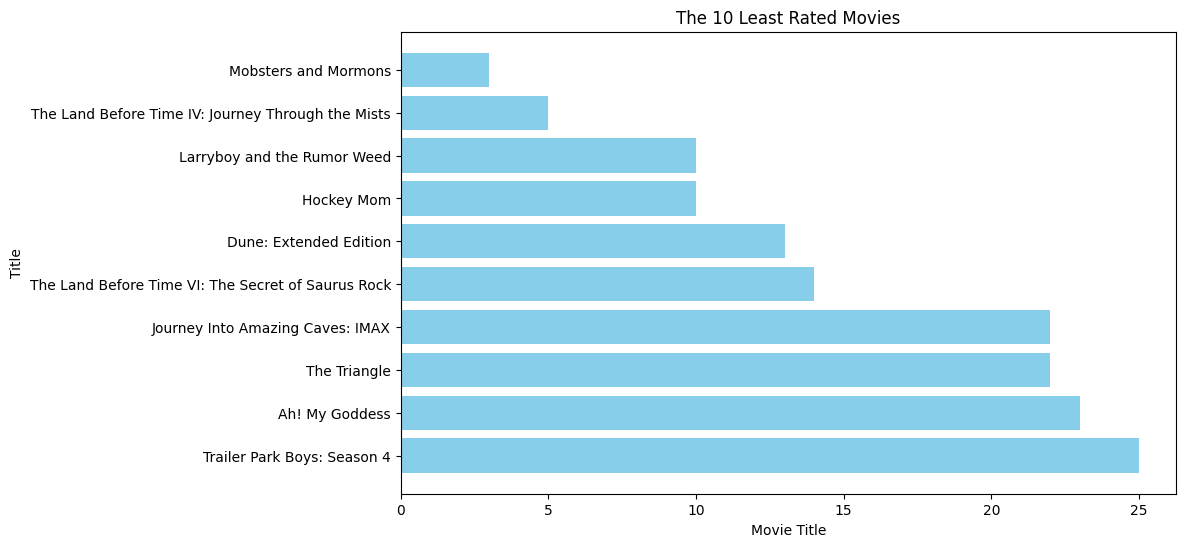

In [40]:
# Parse data
titles, counts = zip(*title_counts)

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(titles, counts, color='skyblue')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.title('The 10 Least Rated Movies')
plt.gca().invert_yaxis()
plt.show()

In [48]:
# Kullanıcıları oy sayısına göre gruplayıp say
user_ratings_count = main_data.rdd \
    .map(lambda x: (x["userID"], 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

print("\nTop 10 Most Frequent Voters:")
for userID, vote_count in user_ratings_count:
    print(f"{userID}: {vote_count}")


Top 10 Most Frequent Voters:
305344: 17653
387418: 17436
2439493: 16565
1664010: 15813
2118461: 14831
1461435: 9822
1639792: 9767
1314869: 9740
2606799: 9064
1932594: 8880


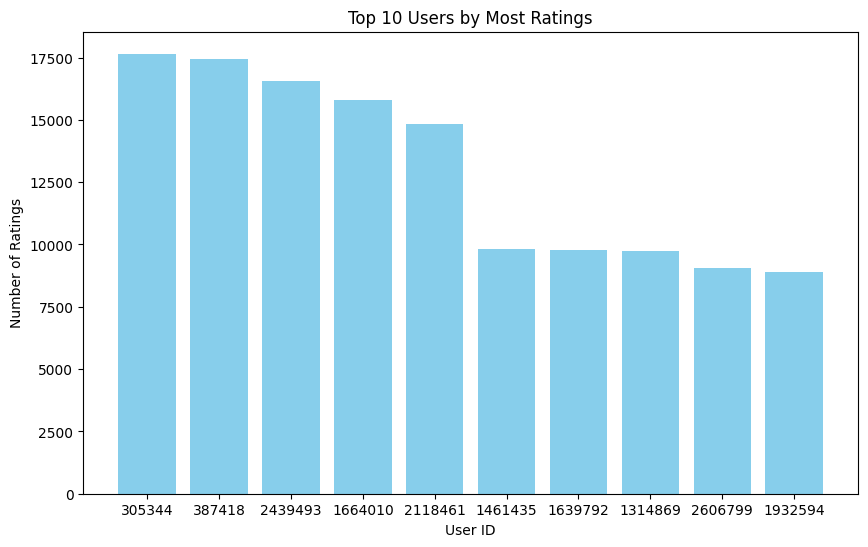

In [55]:
# Verileri grafik için ayrıştır
user_ids = [str(x[0]) for x in user_ratings_count]
ratings_counts = [x[1] for x in user_ratings_count]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(user_ids, ratings_counts, color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Users by Most Ratings')
plt.xticks(user_ids)
plt.show()